In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("telco_customer_churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [6]:
df.drop("customerID", axis = 1, inplace = True)

In [7]:
df["Churn"].map({"No":0, "Yes":1})

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [8]:
df["TotalCharges"] = pd.to_numeric(
    df["TotalCharges"],
    errors = "coerce"
    )

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   str    
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   str    
 3   Dependents        7043 non-null   str    
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   str    
 6   MultipleLines     7043 non-null   str    
 7   InternetService   7043 non-null   str    
 8   OnlineSecurity    7043 non-null   str    
 9   OnlineBackup      7043 non-null   str    
 10  DeviceProtection  7043 non-null   str    
 11  TechSupport       7043 non-null   str    
 12  StreamingTV       7043 non-null   str    
 13  StreamingMovies   7043 non-null   str    
 14  Contract          7043 non-null   str    
 15  PaperlessBilling  7043 non-null   str    
 16  PaymentMethod     7043 non-null   str    
 17  Monthl

In [10]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [11]:
numeric_columns = ["tenure","MonthlyCharges","TotalCharges"]

binary_columns = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","PaperlessBilling"]

ordinal_columns = ["Contract"]

nominal_columns = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
"StreamingTV","StreamingMovies","PaymentMethod"
]


In [12]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [13]:
numeric_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "mean")),
        ("scaler", StandardScaler())
    ]
)

binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("encoder", OrdinalEncoder())
    ]
)

ordinal_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("encoder", OrdinalEncoder(
            categories = [["Month-to-month", "One year", "Two year"]]
        ))
    ]
)

nominal_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("encoder", OneHotEncoder(
            handle_unknown = "ignore",
            sparse_output = False
        ))
    ]
)

In [14]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, numeric_columns),
        ("bin", binary_transformer, binary_columns),
        ("ord", ordinal_transformer, ordinal_columns),
        ("nom", nominal_transformer, nominal_columns)
    ]
)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [16]:
logistic_model = Pipeline(
    steps = [
        ("preprocessing", preprocessor),
        ("classifier", LogisticRegression(max_iter = 1000))
    ]
)


tree_model = Pipeline(
    steps = [
        ("preprocessing", preprocessor),
        ("classifier", DecisionTreeClassifier())
    ]
)

svc_model = Pipeline(
    steps = [
        ("preprocessing", preprocessor),
        ("classifier", SVC())
    ]
)

In [17]:
y = df["Churn"]
y = y.map({"No": 0, "Yes": 1})
X = df.drop("Churn", axis = 1)

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_idx, test_idx in split.split(X,y):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)


In [20]:
logistic_score = cross_val_score(
    logistic_model,
    X_train,
    y_train,
    cv = skf,
    scoring = "accuracy"
)

tree_score = cross_val_score(
    tree_model,
    X_train,
    y_train,
    cv = skf,
    scoring = "accuracy"
)

svc_score = cross_val_score(
    svc_model,
    X_train,
    y_train,
    cv = skf,
    scoring = "accuracy"
)

In [21]:
print(f"Logistic_score: {logistic_score}, \n DecisionTree_score: {tree_score}\n SVC_score: {svc_score}")

Logistic_score: [0.7985803  0.78172138 0.80212955 0.81632653 0.81261101], 
 DecisionTree_score: [0.72670807 0.71517303 0.73114463 0.73380657 0.72113677]
 SVC_score: [0.79680568 0.79414374 0.80922804 0.80567879 0.80994671]


In [22]:
from sklearn.model_selection import cross_validate

logistic_metrics  = pd.DataFrame(cross_validate(
    logistic_model,
    X_train,
    y_train,
    cv = skf,
    scoring={
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall",
        "f1": "f1",
        "roc_auc": "roc_auc"
    },
    return_train_score=True
)
)
logistic_metrics

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.037396,0.020316,0.798580,0.807411,0.645161,0.664329,0.535117,0.554348,0.585009,0.604376,0.847891,0.849083
1,0.035592,0.018454,0.781721,0.811848,0.607287,0.673307,0.501672,0.565217,0.549451,0.614545,0.825366,0.854282
2,0.029812,0.018909,0.802130,0.807411,0.658333,0.661100,0.528428,0.562709,0.586271,0.607949,0.842038,0.851104
3,0.033397,0.017416,0.816327,0.803195,0.664286,0.659114,0.622074,0.535117,0.642487,0.590678,0.862915,0.845565
4,0.031388,0.018445,0.812611,0.803461,0.691304,0.655000,0.531773,0.547659,0.601134,0.596539,0.853094,0.847627


In [23]:
tree_metrics = pd.DataFrame(cross_validate(
    tree_model,
    X_train,
    y_train,
    cv = skf,
    scoring = {
        "accuracy" : "accuracy",
        "precision" : "precision",
        "recall" : "recall",
        "f1" : "f1",
        "roc_auc" : "roc_auc"
    },
    return_train_score = True
)
)
tree_metrics

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.039005,0.018647,0.726708,0.998225,0.484321,0.99916,0.464883,0.994147,0.474403,0.996647,0.642746,0.999991
1,0.037478,0.017252,0.724046,0.998669,0.480519,1.00000,0.494983,0.994983,0.487644,0.997485,0.650263,0.999995
2,0.037913,0.017896,0.732032,0.998225,0.495268,0.99916,0.525084,0.994147,0.509740,0.996647,0.667016,0.999992
3,0.038969,0.017776,0.735581,0.998447,0.501832,0.99916,0.458194,0.994983,0.479021,0.997067,0.646971,0.999993
4,0.036875,0.016335,0.725577,0.998004,0.483444,1.00000,0.488294,0.992475,0.485857,0.996223,0.650878,0.999989


In [24]:
svc_metrics = pd.DataFrame(cross_validate(
    svc_model,
    X_train,
    y_train,
    cv = skf,
    scoring = {
        "accuracy" : "accuracy",
        "precision" : "precision",
        "recall" : "recall",
        "f1" : "f1",
        "roc_auc" : "roc_auc"
    },
    return_train_score = True
))
svc_metrics

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.277865,0.221822,0.796806,0.819170,0.671569,0.720231,0.458194,0.520903,0.544732,0.604561,0.800987,0.858903
1,0.246549,0.228650,0.794144,0.826936,0.646288,0.720339,0.494983,0.568562,0.560606,0.635514,0.762818,0.855640
2,0.244202,0.226971,0.809228,0.818505,0.687500,0.717241,0.515050,0.521739,0.588910,0.604066,0.796790,0.860560
3,0.265739,0.232184,0.805679,0.820280,0.673913,0.725467,0.518395,0.519231,0.586011,0.605263,0.814727,0.852843
4,0.254652,0.248799,0.809947,0.819654,0.711443,0.716874,0.478261,0.529264,0.572000,0.608947,0.800144,0.857413


CV trains models: True

CV returns a trained model: False

CV gives early performance estimate: True

Final .fit() still required: True


<h1>GridSearchCV for Logistic Regression</h1>

<h4>GridSearchCV returns a trained model</h4>
<ul>
	<li>Uses cross-validation internally</li>
	<li>Trains many temporary models</li>
	<li>Tries different hyperparameter combinations</li>
	<li>Selects the best-performing configuration</li>
	<li>Refits one final model using those best parameters</li>
</ul>

Correct mental workflow:
<ul>
<li>Build pipeline</li>
<li>Use CV → sanity check metrics</li>
<li>Use GridSearchCV → tune hyperparameters</li>
<li>Retrieve best estimator</li>
<li> Evaluate once on test set</li>
<li>Done</li>
</ul>

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "classifier__C" : [0.01,0.1,1,10],
    "classifier__penalty": ["l2"],
    "classifier__solver": ["lbfgs"]
}
grid_search = GridSearchCV(
    estimator = logistic_model, #My model defined above
    param_grid = param_grid,
    cv = skf,
    scoring = "recall",
    n_jobs = -1
)

In [26]:
grid_search.fit(X_train, y_train)

/Users/kaustubhsalunke/Desktop/machine_learning/O_REILLY/Chapter6/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/kaustubhsalunke/Desktop/machine_learning/O_REILLY/Chapter6/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/kaustubhsalunke/Desktop/machine_learning/O_REILLY/Chapter6/.venv/lib/python3.14/sit

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=1000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l2'], 'classifier__solver': ['lbfgs']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and 

In [27]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_scores = grid_search.best_score_

In [28]:
print(f" Best Parameters: {best_params}, \n Best Scores: {best_scores}")

 Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}, 
 Best Scores: 0.5478260869565217


<h3>RESULTS</h3>
<h5>Model: Logistic Regression</h5>
<h5>CV metric (recall): 0.548</h5>
<h5>Best parameters: C=10, penalty=l2</h5>

<h1>GridSearchCV for Decision Trees</h1>

In [29]:
param_grid_trees = {
    "classifier__max_depth": [None, 5, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10, 20],
    "classifier__min_samples_leaf": [1, 2, 5, 10],
    "classifier__criterion": ["gini", "entropy"]
}
grid_search_trees = GridSearchCV(
    estimator = tree_model,
    param_grid = param_grid_trees,
    cv = skf,
    scoring = "recall",
    n_jobs = -1
)

In [30]:
grid_search_trees.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__criterion': ['gini', 'entropy'], 'classifier__max_depth': [None, 5, ...], 'classifier__min_samples_leaf': [1, 2, ...], 'classifier__min_samples_split': [2, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosit

In [31]:
best_estimators_trees = grid_search_trees.best_estimator_
best_parameters_trees = grid_search_trees.best_params_
best_scores_trees = grid_search_trees.best_score_
print(f"Best_Estimators: {best_estimators_trees}, \n Best_Params: {best_parameters_trees},\n Best_Scores: {best_scores_trees}")

Best_Estimators: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
      

In [32]:
print(f" Best Parameters: {best_parameters_trees}, \n Best Scores: {best_scores_trees}")

 Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}, 
 Best Scores: 0.5270903010033445


<h3>RESULTS</h3>
<h5>Model: Decision Trees</h5>
<h5>CV metric (recall): 0.524</h5>
<h5>Best parameters: Max_depth: 10, Min_samples_leaf: 1, min_samples_split: 2</h5>

<h1>GridSearchCV SVM</h1>

In [33]:
param_grid_svc = {
    "classifier__kernel": ["rbf", "linear"],
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__gamma": ["scale", "auto", 0.01, 0.1, 1]
}

<ul>
<li>kernel="linear": gamma is ignored (safe to include, sklearn will handle it)</li>
<li>C: regularization strength (same idea as Logistic Regression)</li>
<li>gamma: controls influence of single points (RBF kernel)</li>
</ul>

In [34]:
grid_search_svc = GridSearchCV(
    estimator = svc_model,
    param_grid = param_grid_svc,
    cv = skf,
    scoring = "recall",
    n_jobs = -1
)

In [35]:
grid_search_svc.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...ier', SVC())])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__C': [0.1, 1, ...], 'classifier__gamma': ['scale', 'auto', ...], 'classifier__kernel': ['rbf', 'linear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation ti

In [36]:
best_estimators_svc = grid_search_svc.best_estimator_
best_params_svc = grid_search_svc.best_params_
best_scores_svc = grid_search_svc.best_score_

In [37]:
print(f"Best Estimators: {best_estimators_svc},\n Best Params: {best_params_svc}, \n Best Scores: {best_scores_svc}")

Best Estimators: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
      

In [38]:
print(f" Best Parameters: {best_params_svc}, \n Best Scores: {best_scores_svc}")

 Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}, 
 Best Scores: 0.5311036789297658


<h3>RESULTS</h3>
<h5>Model: SVC</h5>
<h5>CV metric (recall): 0.5311</h5>
<h5>Best parameters: C: 1, Gamma: "scale" , Kernel: Linear</h5>

<h1>Aplying Best Estimated Model to Test Set<h1>

In [39]:
y_pred_logistic = grid_search.best_estimator_.predict(X_test)

In [40]:
y_pred_trees = grid_search_trees.best_estimator_.predict(X_test)

In [41]:
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test)

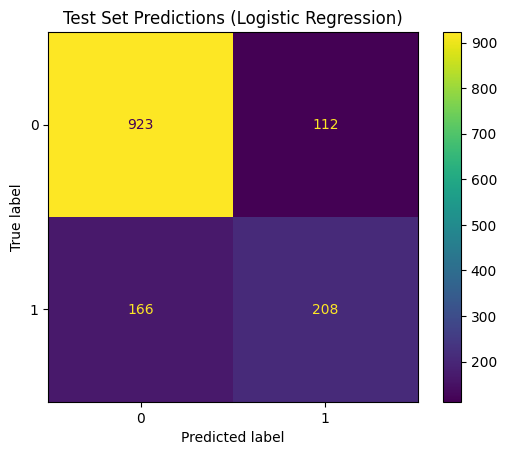

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic)
plt.title("Test Set Predictions (Logistic Regression)")
plt.show()

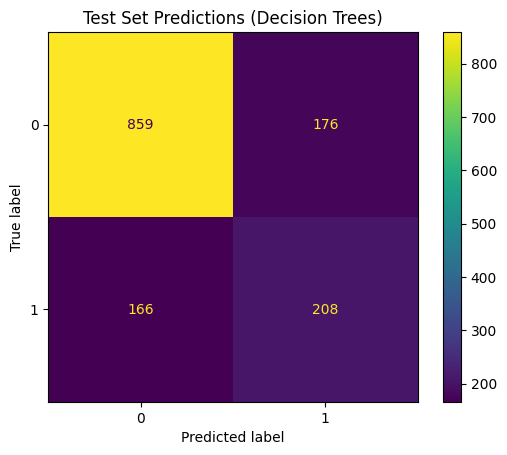

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_trees)
plt.title("Test Set Predictions (Decision Trees)")
plt.show()

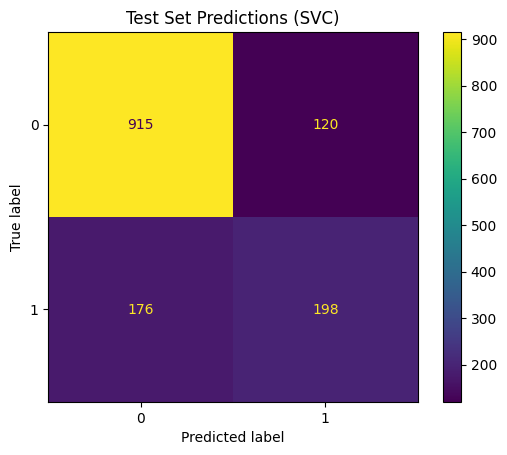

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc)
plt.title("Test Set Predictions (SVC)")
plt.show()

In [45]:
from sklearn.metrics import classification_report

In [46]:
pd.DataFrame(classification_report(y_test,y_pred_logistic, output_dict = True)).transpose().round(3)


,precision,recall,f1-score,support
0,0.848,0.892,0.869,1035.000
1,0.650,0.556,0.599,374.000
accuracy,0.803,0.803,0.803,0.803
macro avg,0.749,0.724,0.734,1409.000
weighted avg,0.795,0.803,0.798,1409.000


In [47]:
pd.DataFrame(classification_report(y_test,y_pred_trees, output_dict = True)).transpose().round(3)

,precision,recall,f1-score,support
0,0.838,0.830,0.834,1035.000
1,0.542,0.556,0.549,374.000
accuracy,0.757,0.757,0.757,0.757
macro avg,0.690,0.693,0.691,1409.000
weighted avg,0.759,0.757,0.758,1409.000


In [48]:
pd.DataFrame(classification_report(y_test,y_pred_svc, output_dict = True)).transpose().round(3)

,precision,recall,f1-score,support
0,0.839,0.884,0.861,1035.00
1,0.623,0.529,0.572,374.00
accuracy,0.790,0.790,0.790,0.79
macro avg,0.731,0.707,0.717,1409.00
weighted avg,0.781,0.790,0.784,1409.00


In [53]:
from sklearn.metrics import roc_auc_score
y_score_logistic = best_model.predict_proba(X_test)[:, 1]
roc_auc_logistic = roc_auc_score(y_test, y_score_logistic)

In [56]:
y_score_tree = best_estimators_trees.predict_proba(X_test)[:, 1]
roc_auc_tree = roc_auc_score(y_test, y_score_tree)

In [57]:
y_score_svc = best_estimators_svc.decision_function(X_test)
roc_auc_svc = roc_auc_score(y_test, y_score_svc)

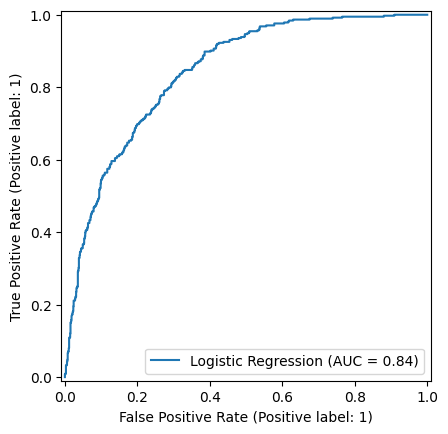

In [59]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_predictions(
    y_test,
    y_score_logistic,
    name="Logistic Regression"
)
plt.show()

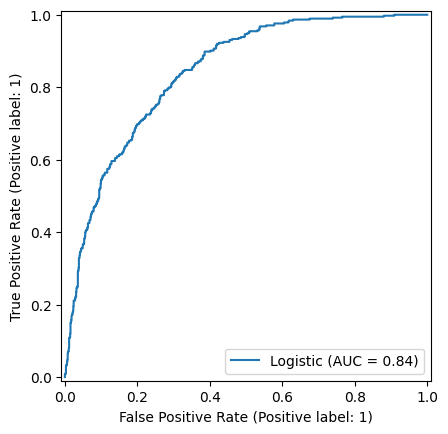

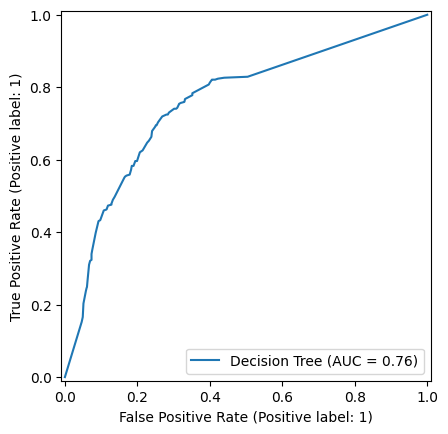

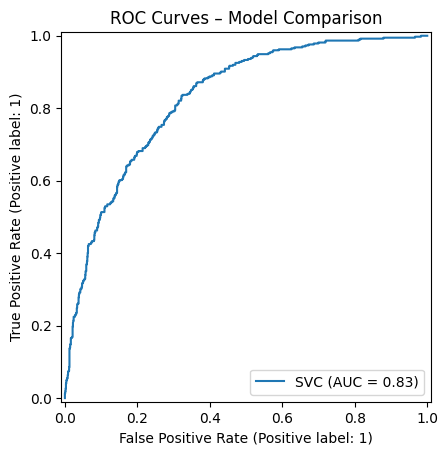

In [60]:
RocCurveDisplay.from_predictions(y_test, y_score_logistic, name="Logistic")
RocCurveDisplay.from_predictions(y_test, y_score_tree, name="Decision Tree")
RocCurveDisplay.from_predictions(y_test, y_score_svc, name="SVC")

plt.title("ROC Curves – Model Comparison")
plt.show()